In [ ]:
##Khang here, credit go to https://github.com/SubrataMaji/IDS-UNSW-NB15/blob/master/1.%20Dataset/About%20Dataset%20and%20It's%20Cleaning.ipynb##

In [1]:
dataset_path="datasets/UNSW-NB15/UNSW-NB15_{}.csv"

In [ ]:
##IMPORT DATA##

In [2]:
import pandas as pd

In [3]:
dfs=[]
for i in range (1,5):
    dfs.append(pd.read_csv(dataset_path.format(i),header=None))
all_data = pd.concat(dfs).reset_index(drop=True)

/tmp/ipykernel_17031/1373810992.py:3: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(dataset_path.format(i),header=None))
/tmp/ipykernel_17031/1373810992.py:3: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(dataset_path.format(i),header=None))


In [4]:
column_names=pd.read_csv("datasets/UNSW-NB15/NUSW-NB15_features.csv", encoding='ISO-8859-1')

In [5]:
column_names['Name'] = column_names['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [6]:
all_data.columns=column_names["Name"]

In [7]:
saved_dict = {}
saved_dict['columns'] = column_names['Name'][column_names['Name']!='label'].tolist()

In [8]:
del column_names

In [9]:
all_data.shape

(2540047, 49)

In [10]:
all_data.info

<bound method DataFrame.info of Name            srcip  sport           dstip dsport proto state       dur  \
0          59.166.0.0   1390   149.171.126.6     53   udp   CON  0.001055   
1          59.166.0.0  33661   149.171.126.9   1024   udp   CON  0.036133   
2          59.166.0.6   1464   149.171.126.7     53   udp   CON  0.001119   
3          59.166.0.5   3593   149.171.126.5     53   udp   CON  0.001209   
4          59.166.0.3  49664   149.171.126.0     53   udp   CON  0.001169   
...               ...    ...             ...    ...   ...   ...       ...   
2540042    59.166.0.5  33094   149.171.126.7  43433   tcp   FIN  0.087306   
2540043    59.166.0.7  20848   149.171.126.4     21   tcp   CON  0.365058   
2540044    59.166.0.3  21511   149.171.126.9     21   tcp   CON  6.335154   
2540045    59.166.0.9  35433   149.171.126.0     80   tcp   CON  2.200934   
2540046  175.45.176.0  17293  149.171.126.17    110   tcp   CON  0.942984   

Name     sbytes  dbytes  sttl  ...  ct_ftp_

In [11]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [12]:
##Cleaning and Preprocessing##

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(all_data,test_size=0.3,random_state=16)

In [ ]:
del all_data

In [14]:
print(train.shape,'\n',test.shape)

(1778032, 49) 
 (762015, 49)


In [15]:
train.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [16]:
train['attack_cat'].value_counts()

attack_cat
Generic             150906
Exploits             31507
 Fuzzers             13345
DoS                  11433
 Reconnaissance       8544
 Fuzzers              3569
Analysis              1855
Backdoor              1242
Reconnaissance        1220
 Shellcode             904
Backdoors              374
Shellcode              151
Worms                  120
Name: count, dtype: int64

In [19]:
train['attack_cat']=train.attack_cat.fillna(value="normal").apply(lambda x:x.strip().lower())

In [20]:
train['attack_cat'].value_counts()

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64

In [21]:
train['ct_flw_http_mthd'] = train.ct_flw_http_mthd.fillna(value=0)

In [22]:
train['is_ftp_login'].value_counts()

is_ftp_login
0.0    746536
1.0     30329
4.0       109
2.0        21
Name: count, dtype: int64

In [23]:
train['is_ftp_login'] = (train.is_ftp_login.fillna(value=0)).astype(int)

In [25]:
train.isnull().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [26]:
train.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

In [27]:
train_0, train_1 = train['label'].value_counts()[0] / len(train.index), train['label'].value_counts()[1] / len(train.index)
test_0, test_1 = test['label'].value_counts()[0] / len(test.index), test['label'].value_counts()[1] / len(test.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0, test_1))


In Train: there are 0.8733599845222133 % of class 0 and 0.12664001547778667 % of class 1
In Test: there are 0.8738699369434985 % of class 0 and 0.1261300630565015 % of class 1


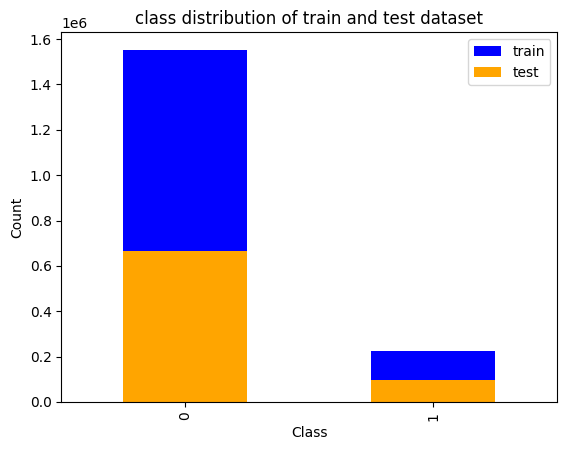

In [29]:
import matplotlib.pyplot as plt

# Plotting target label distribution
plt.figure()
plt.title("class distribution of train and test dataset")
train['label'].value_counts().plot(kind="bar", color='b', label="train")
test['label'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

In [30]:
# Check if any null value present in datasets
train.isnull().sum().sum(), test.isnull().sum().sum()  # No Null in train and test data is still raw

(np.int64(0), np.int64(1499013))

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778032 entries, 81030 to 2079982
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit           

In [32]:
train.dtypes.value_counts()

int64      29
float64    11
object      9
Name: count, dtype: int64

In [34]:
import numpy as np
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [35]:
train['ct_ftp_cmd'].unique()

array([0, ' ', 1, '1', '0', 5, 2, 3, 4, '4', 6, '2', 8], dtype=object)

In [36]:
train['ct_ftp_cmd'] = train['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [37]:
train['ct_ftp_cmd'].unique()

array([0, 1, 5, 2, 3, 4, 6, 8])

In [38]:
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [39]:
train.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')

In [40]:
saved_dict['binary_col'] = ['is_sm_ips_ports', 'is_ftp_login']

In [41]:
saved_dict

{'columns': ['srcip',
  'sport',
  'dstip',
  'dsport',
  'proto',
  'state',
  'dur',
  'sbytes',
  'dbytes',
  'sttl',
  'dttl',
  'sloss',
  'dloss',
  'service',
  'sload',
  'dload',
  'spkts',
  'dpkts',
  'swin',
  'dwin',
  'stcpb',
  'dtcpb',
  'smeansz',
  'dmeansz',
  'trans_depth',
  'res_bdy_len',
  'sjit',
  'djit',
  'stime',
  'ltime',
  'sintpkt',
  'dintpkt',
  'tcprtt',
  'synack',
  'ackdat',
  'is_sm_ips_ports',
  'ct_state_ttl',
  'ct_flw_http_mthd',
  'is_ftp_login',
  'ct_ftp_cmd',
  'ct_srv_src',
  'ct_srv_dst',
  'ct_dst_ltm',
  'ct_src_ltm',
  'ct_src_dport_ltm',
  'ct_dst_sport_ltm',
  'ct_dst_src_ltm',
  'attack_cat'],
 'binary_col': ['is_sm_ips_ports', 'is_ftp_login']}

In [42]:
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(train[col].value_counts())
    print()

is_sm_ips_ports
0    1775116
1       2916
Name: count, dtype: int64

is_ftp_login
0    1747573
1      30329
4        109
2         21
Name: count, dtype: int64



In [43]:
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])

In [44]:
train['is_ftp_login'].value_counts()

is_ftp_login
0    1747573
1      30459
Name: count, dtype: int64

In [45]:
train['service'].value_counts()

service
-           872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: count, dtype: int64

In [46]:
train['service'] = train['service'].apply(lambda x:"None" if x=="-" else x)

In [47]:
train['service'].value_counts()

service
None        872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: count, dtype: int64

In [48]:
train['attack_cat'].nunique()

11

In [49]:
train['attack_cat'].value_counts()

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64

In [50]:
train['attack_cat'] = train['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [51]:
train.shape, test.shape

((1778032, 49), (762015, 49))

In [ ]:
train.to_csv('./train_alldata_EDA.csv', index=False)
test.to_csv('./test_alldata_EDA.csv', index=False)

In [54]:
import pickle
pickle.dump(saved_dict, open('./final_ipynb', 'wb'))